In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split


In [4]:
train = pd.read_csv("./따릉이/train.csv")
test = pd.read_csv("./따릉이/test.csv")

In [12]:
X_train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [13]:
X_test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [14]:
X_train['hour_bef_windspeed'].mean()

2.4790344827586246

In [21]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [55]:
sns.barplot(x= 'hour_bef_ozone', y='hour', data=train) #오존량 시간이 갈 수록 증가

AttributeError: module 'seaborn' has no attribute 'implot'

In [30]:
rain_1=train[train['hour_bef_precipitation']==1.0]['hour_bef_precipitation'].count()
rain_0=train[train['hour_bef_precipitation']==0.0]['hour_bef_precipitation'].count()

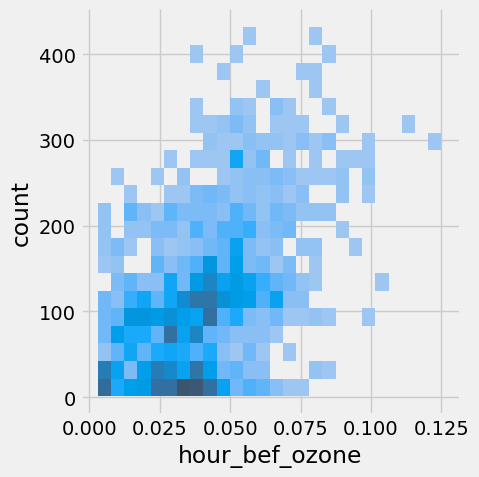

In [43]:
sns.displot(train, x="hour_bef_ozone", y='count')

In [44]:
df_pivot = pd.pivot_table(train, 
                         index = 'hour_bef_ozone',
                         columns = 'hour',
                         values = 'count',
                         aggfunc = ['mean'])

df_pivot

mean                                                        \
hour              0     2     3     4     5     6           7           8    
hour_bef_ozone                                                               
0.003           98.0  40.0  34.0   NaN   NaN   NaN  101.000000         NaN   
0.004           53.0  28.0  21.5   9.0  12.0  23.5   60.666667  101.000000   
0.005            NaN  20.0  28.5  10.5  16.0  37.0   48.000000  139.666667   
0.006            NaN  41.0  15.0   NaN  14.5  13.0  106.000000  154.666667   
0.007            NaN   NaN   8.0  12.0   NaN   NaN   46.000000  194.000000   
...              ...   ...   ...   ...   ...   ...         ...         ...   
0.099            NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   
0.100            NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   
0.106            NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   
0.112            NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   
0.125            NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   

                            ...                                                \
hour              9     10  ...  14     15     16     17     18     19     20   
hour_bef_ozone              ...                                                 
0.003            NaN   NaN  ... NaN    NaN    NaN    NaN    NaN    NaN    NaN   
0.004            NaN   NaN  ... NaN    NaN    NaN    NaN    NaN    NaN    NaN   
0.005           73.5  30.0  ... NaN    NaN    NaN    NaN    NaN    NaN    NaN   
0.006            NaN   NaN  ... NaN    NaN    NaN    NaN    NaN    NaN    NaN   
0.007           82.0  13.0  ... NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...              ...   ...  ...  ..    ...    ...    ...    ...    ...    ...   
0.099            NaN   NaN  ... NaN  162.0    NaN    NaN    NaN    NaN    NaN   
0.100            NaN   NaN  ... NaN    NaN  304.0    NaN    NaN  247.0  249.0   
0.106            NaN   NaN  ... NaN    NaN  126.0    NaN    NaN    NaN    NaN   
0.112            NaN   NaN  ... NaN    NaN    NaN  324.0    NaN    NaN    NaN   
0.125            NaN   NaN  ... NaN    NaN    NaN    NaN  300.0    NaN    NaN   

                                  
hour            21     22     23  
hour_bef_ozone                    
0.003          NaN    NaN    NaN  
0.004          NaN    NaN  129.0  
0.005          NaN    NaN    NaN  
0.006          NaN  110.0  101.0  
0.007          NaN    NaN   11.0  
...             ..    ...    ...  
0.099          NaN    NaN    NaN  
0.100          NaN    NaN    NaN  
0.106          NaN    NaN    NaN  
0.112          NaN    NaN    NaN  
0.125          NaN    NaN    NaN  

[95 rows x 23 columns]

In [48]:
sns.heatmap(hour_bef_humidity.corr(), vmin=1, vmax=1, annot=True, linewidths=0.2,cmap='Reds')
#vmin, vmax = 최소, 최대

NameError: name 'hour_bef_humidity' is not defined

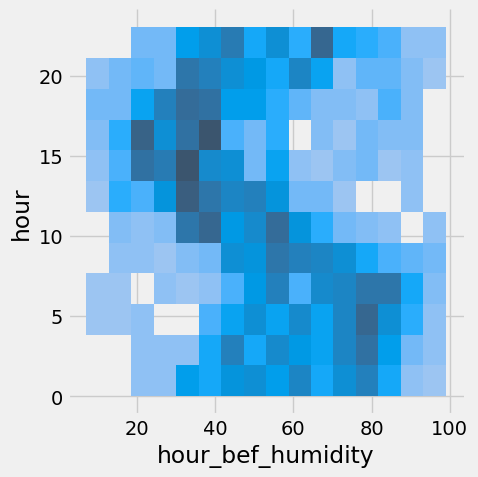

In [47]:
sns.displot(train, x="hour_bef_humidity", y='hour')

In [45]:
df_pivot = pd.pivot_table(train, 
                         index = 'hour_bef_humidity',
                         columns = 'hour',
                         values = 'count',
                         aggfunc = ['mean'])

df_pivot

mean                                                     \
hour                0    1    2    3    4     5    6     7      8      9    
hour_bef_humidity                                                           
7.0                NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN    NaN   
8.0                NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN    NaN   
9.0                NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN    NaN   
10.0               NaN  NaN  NaN  NaN  NaN  10.0  NaN   NaN    NaN    NaN   
11.0               NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN    NaN   
...                ...  ...  ...  ...  ...   ...  ...   ...    ...    ...   
93.0               NaN  NaN  NaN  NaN  NaN   NaN  3.0   6.0    NaN    NaN   
94.0               NaN  NaN  NaN  NaN  NaN   NaN  NaN  37.0  165.0  111.0   
95.0               NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN    NaN   
98.0               NaN  NaN  8.0  3.0  2.0   1.0  NaN   NaN    NaN    NaN   
99.0               NaN  6.0  NaN  NaN  NaN   NaN  5.0  15.0   41.0   52.0   

                   ...                                                         \
hour               ...  14  15     16     17     18     19     20     21   22   
hour_bef_humidity  ...                                                          
7.0                ... NaN NaN    NaN    NaN  431.0    NaN    NaN    NaN  NaN   
8.0                ... NaN NaN    NaN    NaN    NaN  317.0    NaN    NaN  NaN   
9.0                ... NaN NaN    NaN    NaN    NaN    NaN  271.0    NaN  NaN   
10.0               ... NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN   
11.0               ... NaN NaN  149.0  214.0  336.0    NaN    NaN  278.0  NaN   
...                ...  ..  ..    ...    ...    ...    ...    ...    ...  ...   
93.0               ... NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN   
94.0               ... NaN NaN    NaN    NaN    NaN    NaN    1.0    NaN  NaN   
95.0               ... NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN  2.0   
98.0               ... NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN   
99.0               ... NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN   

                        
hour                23  
hour_bef_humidity       
7.0                NaN  
8.0                NaN  
9.0                NaN  
10.0               NaN  
11.0               NaN  
...                ...  
93.0               NaN  
94.0               NaN  
95.0               NaN  
98.0               1.0  
99.0               NaN  

[91 rows x 24 columns]

In [74]:
from sklearn.linear_model import LogisticRegression #선형회귀

from sklearn.ensemble import RandomForestRegressor #랜덤포레스트
from sklearn.model_selection import GridSearchCV #GVsearch
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearch 

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_ozone', 'hour_bef_windspeed', 'hour_bef_humidity']

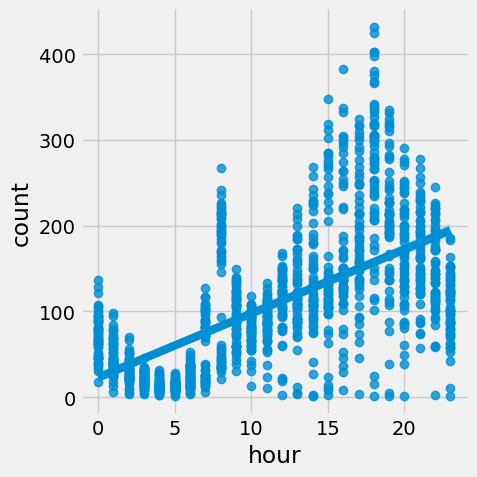

In [49]:
sns.lmplot(x = 'hour', y = 'count', data = train)

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Playdata\anacond

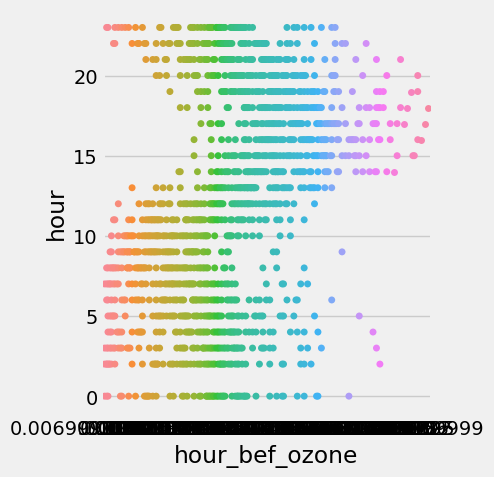

In [51]:
sns.catplot(data=train, x="hour_bef_ozone", y="hour", kind="swarm") #10시에서 15시까지 많아졌다 20시까지 순차적으로 하락

In [ ]:
multi_logit = LogisticRegression(multi_class="multinomial")
multi_logit.fit(train, train_target)

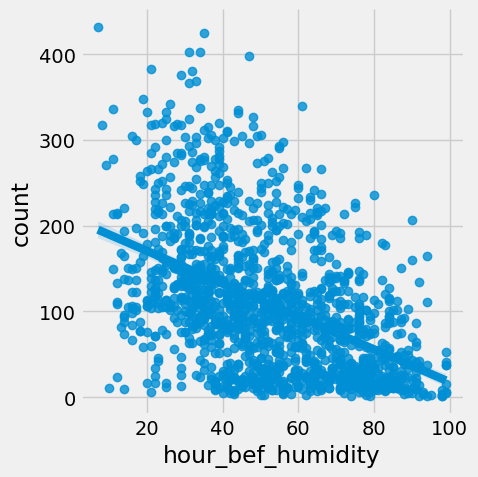

In [54]:
sns.lmplot(x = 'hour_bef_humidity', y = 'count', data = train) #습도가 낮을수록, 오존이 낮을 수록 사람이 많이 이용.

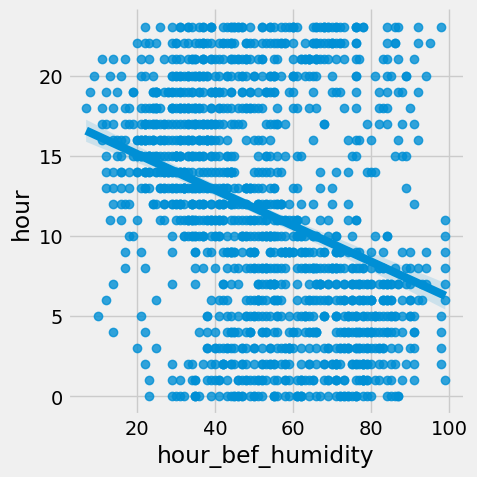

In [56]:
sns.lmplot(x = 'hour_bef_humidity', y = 'hour', data = train)

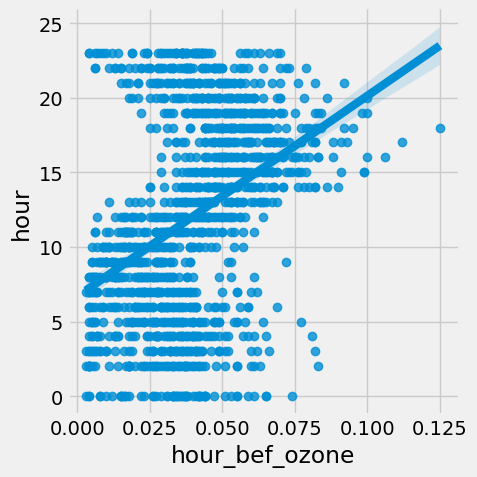

In [57]:
sns.lmplot(x = 'hour_bef_ozone', y = 'hour', data = train)

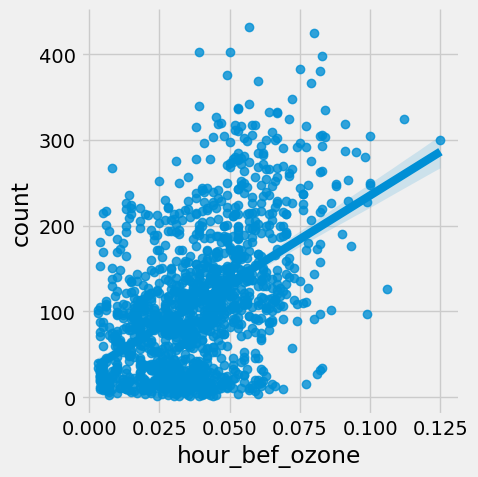

In [61]:
sns.lmplot(x = 'hour_bef_ozone', y = 'count', data = train) 
#근데 오존이 낮을 수록 인원이 적지만, 튀어나온 값이 많아서 상대적으로 비중이 적어도 될듯?)

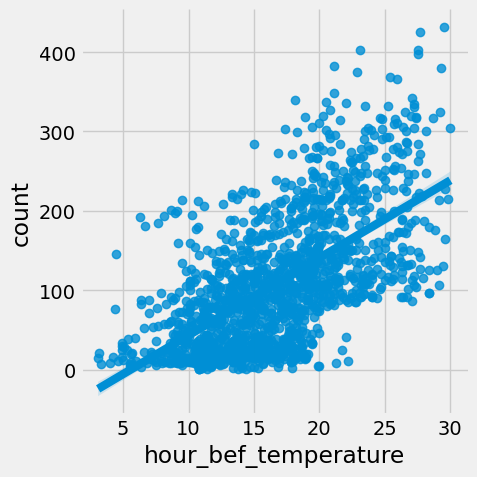

In [60]:
sns.lmplot(x = 'hour_bef_temperature', y = 'count', data = train) #온도가 높다 : 여름, 낮다 : 겨울 선형관계.
#그렇다면 겨울보단 여름에 따릉이 이용수가 많다.                                                 

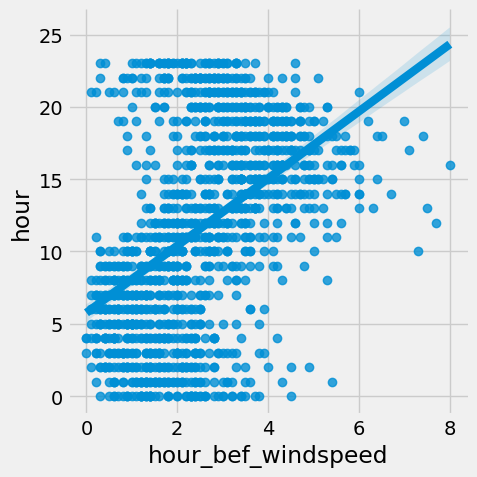

In [5]:
sns.lmplot(x = 'hour_bef_windspeed', y = 'hour', data = train)

<AxesSubplot: ylabel='hour_bef_visibility'>

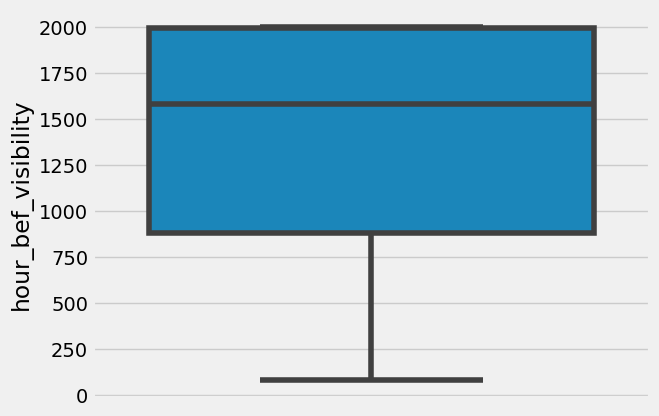

In [6]:
sns.boxplot(y=train['hour_bef_visibility'], data=train)

<AxesSubplot: ylabel='hour_bef_windspeed'>

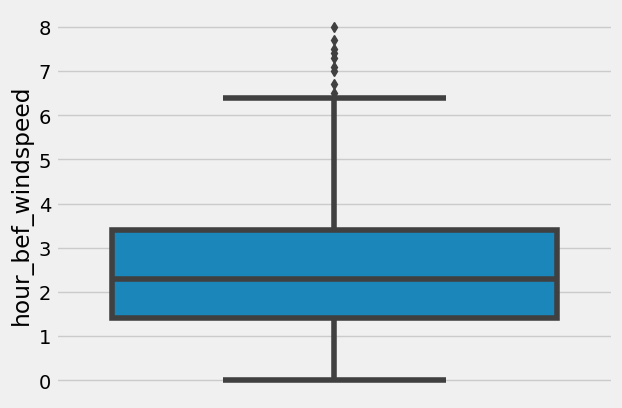

In [6]:
sns.boxplot(y=train['hour_bef_windspeed'], data=train)

<AxesSubplot: ylabel='hour_bef_ozone'>

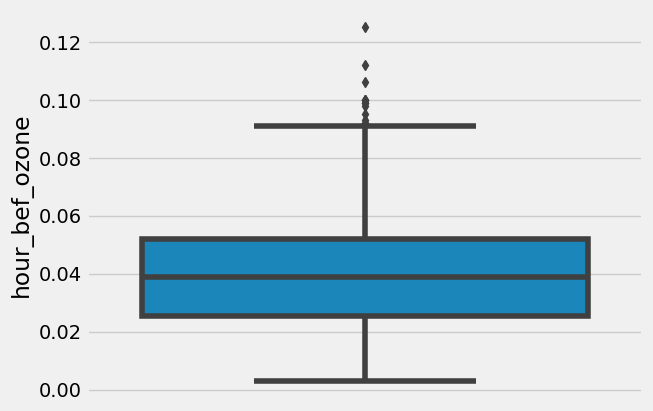

In [8]:
sns.boxplot(y=train['hour_bef_ozone'], data=train)

<AxesSubplot: ylabel='hour_bef_temperature'>

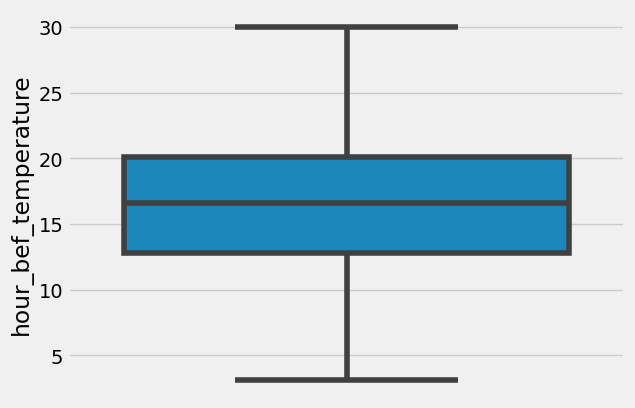

In [7]:
sns.boxplot(y=train['hour_bef_temperature'], data=train)

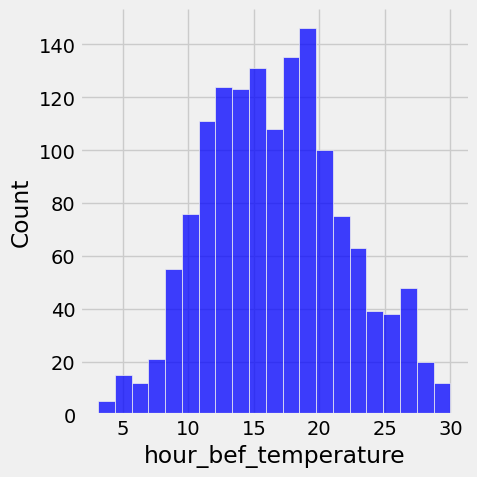

In [7]:
sns.displot(train["hour_bef_temperature"], color="b")

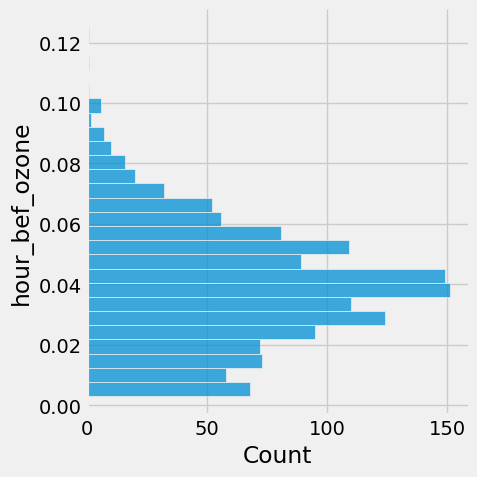

In [9]:
sns.displot(y=train['hour_bef_ozone'], data=train)

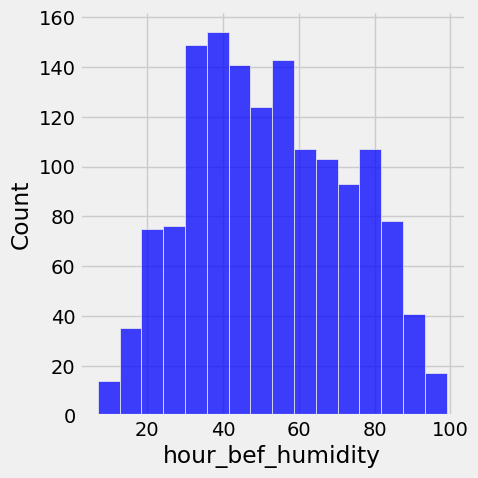

In [8]:
sns.displot(train["hour_bef_humidity"], color="b")

In [65]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   float64
 1   hour_bef_precipitation  1459 non-null   float64
 2   hour_bef_windspeed      1459 non-null   float64
 3   hour_bef_ozone          1459 non-null   float64
 4   hour_bef_ visibility    1459 non-null   float64
dtypes: float64(5)
memory usage: 57.1 KB


In [80]:
train.fillna('0')

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.04,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [90]:
test = test.drop(['hour_bef_humidity','hour_bef_pm10', 'hour_bef_pm2.5','hour_bef_temperature'],axis=1)
train = train.drop(['hour_bef_humidity','hour_bef_pm10', 'hour_bef_pm2.5','hour_bef_temperature'],axis=1)

In [ ]:
test = test.drop(['hour_bef_humidity','hour_bef_pm10', 'hour_bef_pm2.5','hour_bef_temperature'],axis=1)
train = train.drop(['hour_bef_humidity','hour_bef_pm10', 'hour_bef_pm2.5','hour_bef_temperature'],axis=1)

In [111]:
train.head()

,hour,hour_bef_precipitation,hour_bef_windspeed,hour_bef_ozone,hour_bef_ visibility
0,20.0,1.0,1.5,0.027,576.0
1,13.0,0.0,1.4,0.042,916.0
2,6.0,0.0,0.7,0.033,1382.0
3,23.0,0.0,2.7,0.040,946.0
4,18.0,0.0,4.8,0.057,2000.0


In [110]:
train = train.drop(['hour_bef_visibility'],axis=1)

In [115]:
train.isna().sum()

hour                      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_ozone            0
hour_bef_ visibility      0
dtype: int64

In [ ]:
train = train.concat

In [103]:
train['hour_bef_precipitation'] =train['hour_bef_temperature'].fillna(train['hour_bef_temperature'].mean())
test['hour_bef_'] =test['hour_bef_temperature'].fillna(train['hour_bef_temperature'].mean())

train['hour_bef_windspeed'] =train['hour_bef_windspeed'].fillna(train['hour_bef_windspeed'].mean())
test['hour_bef_windspeed'] =test['hour_bef_windspeed'].fillna(train['hour_bef_windspeed'].mean())

train['hour_bef_ozone'] =train['hour_bef_ozone'].fillna(train['hour_bef_ozone'].mean())
test['hour_bef_ozone'] =test['hour_bef_ozone'].fillna(train['hour_bef_ozone'].mean())

train['hour_bef_ visibility'] =train['hour_bef_visibility'].fillna(train['hour_bef_visibility'].mean())
test['hour_bef_visibility'] =test['hour_bef_visibility'].fillna(train['hour_bef_visibility'].mean())

In [105]:
train['hour'] = train['hour'].astype('float')
test['hour'] = test['hour'].astype('float')

In [118]:
labels = train["count"]
train = train.drop(['count', 'id'], axis =1)
x_train, x_val, y_train, y_val = train_test_split(train, labels, test_size = 0.22, random_state =42)

KeyError: 'count'

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val)*100,2)

acc_gaussian

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred,y_val)*100,2)
acc_logreg

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val)*100,2)
acc_decisiontree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val)*100,2)
acc_svc

In [ ]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Logistic Regression', 'Random Forest','Decision Tree', 'Support Vector Machine'],
    'Score': [acc_knn, acc_logreg, acc_randomforest, acc_decisiontree, acc_svc]
})
models.sort_values(by='Score', ascending=False) 

In [ ]:
## error
#Found input variables with inconsistent numbers of samples : why?
#